# Credit Risk Analysis:

Project Objective: Develop models to predict the probability of default for credit applicants using historical loan data.

Public Datasets: UCI Machine Learning Repository has several datasets related to credit scoring.

Tools and Skills: Python or R for statistical modeling, SQL for data manipulation, and Tableau or Power BI for visualizing the risk profiles.

# Credit Risk Analysis Project

## Files Description

- **features.csv**: Contains the features of the dataset that describe various attributes of credit applicants.
- **targets.csv**: Contains the target variable indicating whether the credit risk is classified as 'good' or 'bad'.
- **metadata_and_variables.txt**: Contains metadata and detailed descriptions of the variables in the dataset.

## Project Steps

### Step 1: Load and Prepare Data
Load the data from the `features.csv` and `targets.csv` files, and prepare it for analysis. This involves checking for missing values, exploring data types, and potentially normalizing or encoding data as needed.

### Step 2: Exploratory Data Analysis (EDA)
Conduct an exploratory analysis to understand the distributions, correlations, and potential relationships within the data. This step can help in identifying which features are most relevant for predicting credit risk.

### Step 3: Data Visualization
Use tools like Tableau or Power BI to visualize the data and explore patterns that might be important for model building. Visualization can be especially helpful in understanding complex relationships and in communicating findings to stakeholders.

### Step 4: Statistical Modeling
Develop statistical models using Python or R. Given the data and the project's classification nature, models like logistic regression, decision trees, or more advanced ensemble methods like random forests or gradient boosting machines could be appropriate. Model selection should consider the prediction performance and the interpretability of the models.

### Step 5: Model Evaluation
Evaluate the models using appropriate metrics such as accuracy, AUC-ROC, precision, recall, and F1-score. Since the dataset includes a cost matrix, it's crucial to consider the cost of misclassification in the evaluation to minimize potential financial losses.

### Step 6: SQL for Data Manipulation
Utilize SQL for more efficient data manipulation and preparation if the data volume increases or if you need to integrate data from multiple sources.

### Step 7: Model Deployment
Prepare the model for deployment in a production environment where it can be used to predict default probabilities for new credit applicants in real-time.

### Step 8: Continuous Monitoring and Updating
Establish a process for continuously monitoring the model's performance over time against new data and updating the model as necessary to maintain its accuracy and relevance.


In [1]:
!pip3 install -U ucimlrepo 

In [2]:
from ucimlrepo import fetch_ucirepo, list_available_datasets

# check which datasets can be imported
list_available_datasets()


-------------------------------------
The following datasets are available:
-------------------------------------
Dataset Name                                                                            ID    
------------                                                                            --    
Abalone                                                                                 1     
Adult                                                                                   2     
Annealing                                                                               3     
Audiology (Standardized)                                                                8     
Auto MPG                                                                                9     
Automobile                                                                              10    
Balance Scale                                                                           12    
Balloons                       

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
statlog_german_credit_data = fetch_ucirepo(id=144) 
  
# data (as pandas dataframes) 
X = statlog_german_credit_data.data.features 
y = statlog_german_credit_data.data.targets 
  
# metadata 
print(statlog_german_credit_data.metadata) 
  
# variable information 
print(statlog_german_credit_data.variables) 


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [4]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# Fetch dataset
statlog_german_credit_data = fetch_ucirepo(id=144)

# Data (as pandas dataframes)
X = statlog_german_credit_data.data.features
y = statlog_german_credit_data.data.targets

# Save features and targets to CSV
X.to_csv('features.csv', index=False)
y.to_csv('targets.csv', index=False)

# Metadata and variable information can also be printed or saved
print(statlog_german_credit_data.metadata)
print(statlog_german_credit_data.variables)

# Optionally, save metadata and variables to a text file
with open('metadata_and_variables.txt', 'w') as f:
    f.write(str(statlog_german_credit_data.metadata))
    f.write("\n")
    f.write(str(statlog_german_credit_data.variables))


{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

## Step 1: Load and Prepare Data
Loading data and preparing it for analysis. This includes handling missing values if necessary, although from your dataset's description, there are no missing values.

In [7]:
import pandas as pd

# Load the data
features = pd.read_csv('C:/Users/dhill/features.csv')
targets = pd.read_csv('C:/Users/dhill/targets.csv')

# Check the first few rows of the dataset
print(features.head())
print(targets.head())

# Check for any missing values and data types
print(features.info())
print(targets.info())


  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
0        A11           6        A34        A43        1169        A65   
1        A12          48        A32        A43        5951        A61   
2        A14          12        A34        A46        2096        A61   
3        A11          42        A32        A42        7882        A61   
4        A11          24        A33        A40        4870        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
0        A75           4        A93        A101            4        A121   
1        A73           2        A92        A101            2        A121   
2        A74           2        A93        A101            3        A121   
3        A74           2        A93        A103            4        A122   
4        A73           3        A93        A101            4        A124   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
0           67        A1

## Step 2: Exploratory Data Analysis (EDA)
For exploratory data analysis, a look at summary statistics, distribution of data, and correlation between features.

        Attribute2    Attribute5   Attribute8  Attribute11  Attribute13  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     20.903000   3271.258000     2.973000     2.845000    35.546000   
std      12.058814   2822.736876     1.118715     1.103718    11.375469   
min       4.000000    250.000000     1.000000     1.000000    19.000000   
25%      12.000000   1365.500000     2.000000     2.000000    27.000000   
50%      18.000000   2319.500000     3.000000     3.000000    33.000000   
75%      24.000000   3972.250000     4.000000     4.000000    42.000000   
max      72.000000  18424.000000     4.000000     4.000000    75.000000   

       Attribute16  Attribute18  
count  1000.000000  1000.000000  
mean      1.407000     1.155000  
std       0.577654     0.362086  
min       1.000000     1.000000  
25%       1.000000     1.000000  
50%       1.000000     1.000000  
75%       2.000000     1.000000  
max       4.000000     2.000000  


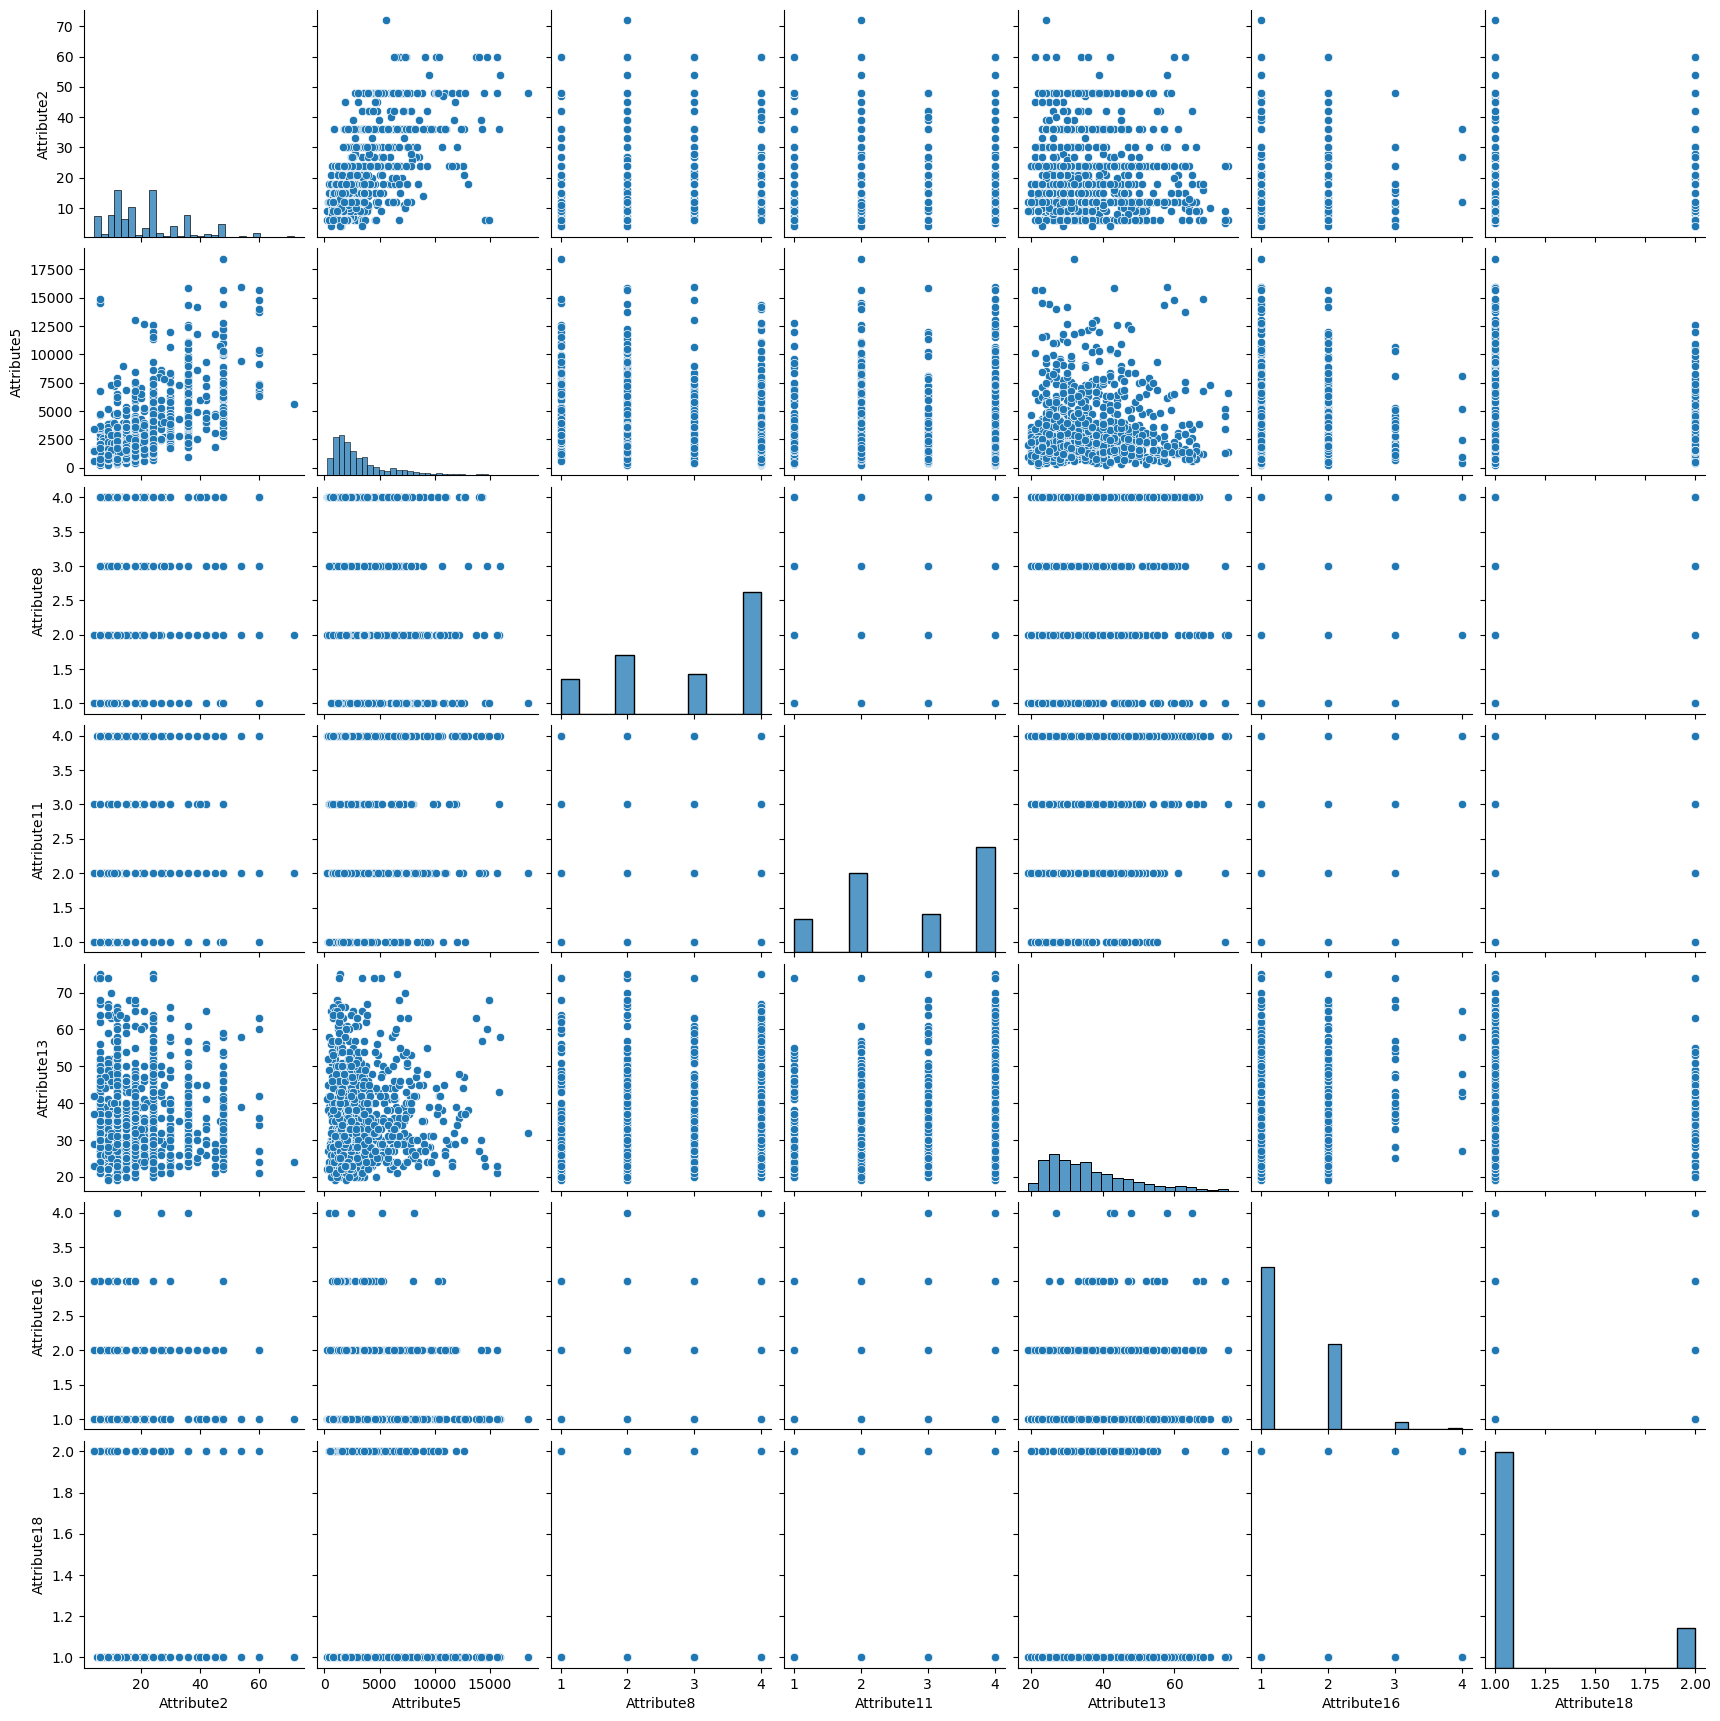

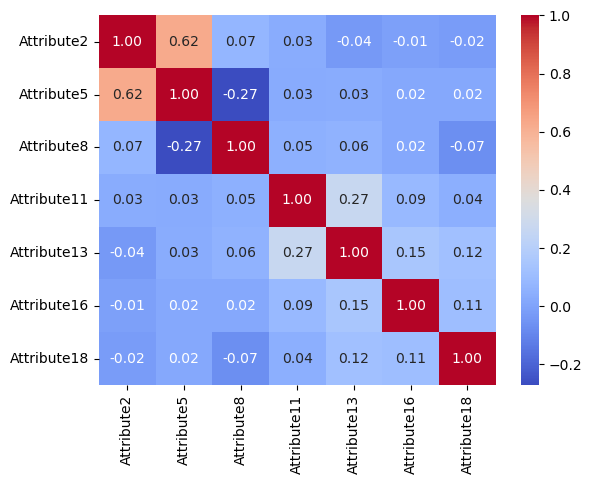

In [8]:
# Summary statistics
print(features.describe())

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize the distribution of features and relationships between them
sns.pairplot(features)
plt.show()

# Correlation heatmap
sns.heatmap(features.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.show()


## Step 3: Data Visualization
For visualization, creating more specific plots to understand the relationships between features and the target variable.

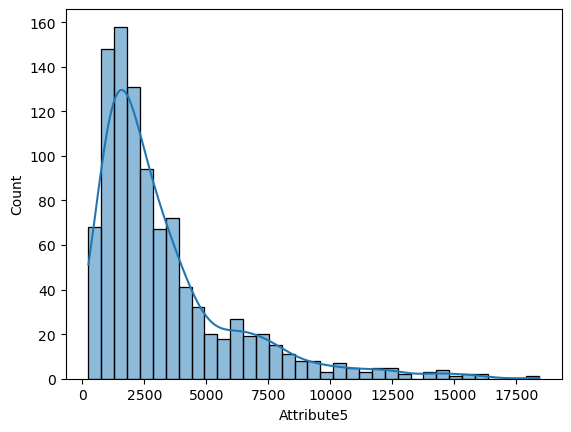

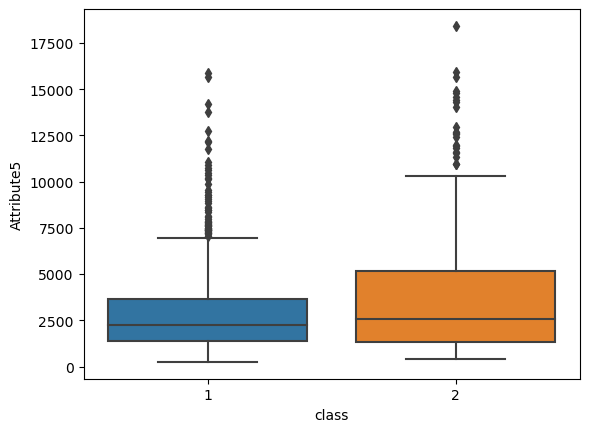

In [10]:
# Example: Distribution of credit amount which is Attribute5
sns.histplot(data=features, x='Attribute5', kde=True)
plt.show()

# Relationship between credit amount and target
sns.boxplot(x=targets['class'], y=features['Attribute5'])
plt.show()


## Step 4: Statistical Modeling
Now, you can build a model to predict the credit risk. Let’s use a logistic regression model as an example.

In [12]:
# 4.1 Identify Categorical Features
# First, identify which columns are categorical. You can do this by examining the data types or unique values in each column.
# Print data types of each column
print(features.dtypes)

# Print unique values in columns that are of object type
for col in features.columns:
    if features[col].dtype == 'object':
        print(f'{col}:', features[col].unique())


Attribute1     object
Attribute2      int64
Attribute3     object
Attribute4     object
Attribute5      int64
Attribute6     object
Attribute7     object
Attribute8      int64
Attribute9     object
Attribute10    object
Attribute11     int64
Attribute12    object
Attribute13     int64
Attribute14    object
Attribute15    object
Attribute16     int64
Attribute17    object
Attribute18     int64
Attribute19    object
Attribute20    object
dtype: object
Attribute1: ['A11' 'A12' 'A14' 'A13']
Attribute3: ['A34' 'A32' 'A33' 'A30' 'A31']
Attribute4: ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
Attribute6: ['A65' 'A61' 'A63' 'A64' 'A62']
Attribute7: ['A75' 'A73' 'A74' 'A71' 'A72']
Attribute9: ['A93' 'A92' 'A91' 'A94']
Attribute10: ['A101' 'A103' 'A102']
Attribute12: ['A121' 'A122' 'A124' 'A123']
Attribute14: ['A143' 'A141' 'A142']
Attribute15: ['A152' 'A153' 'A151']
Attribute17: ['A173' 'A172' 'A174' 'A171']
Attribute19: ['A192' 'A191']
Attribute20: ['A201' 'A202']


In [13]:
# 4.2 . Encode Categorical Features
# Once you've identified the categorical columns, you can use encoding techniques to convert these columns to numerical format.
# A common approach is to use one-hot encoding, which can be easily done with pandas using get_dummies.

# One-hot encode the categorical columns
features_encoded = pd.get_dummies(features, drop_first=True)

# Now check the first few rows to see the changes
print(features_encoded.head())


   Attribute2  Attribute5  Attribute8  Attribute11  Attribute13  Attribute16  \
0           6        1169           4            4           67            2   
1          48        5951           2            2           22            1   
2          12        2096           2            3           49            1   
3          42        7882           2            4           45            1   
4          24        4870           3            4           53            2   

   Attribute18  Attribute1_A12  Attribute1_A13  Attribute1_A14  ...  \
0            1               0               0               0  ...   
1            1               1               0               0  ...   
2            2               0               0               1  ...   
3            2               0               0               0  ...   
4            2               0               0               0  ...   

   Attribute12_A124  Attribute14_A142  Attribute14_A143  Attribute15_A152  \
0              

In [14]:
# 4.3. Update Model Training Code
# Now that all features are numerical, update your model training code to use the encoded features.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Split the encoded data
X_train, X_test, y_train, y_test = train_test_split(features_encoded, targets['class'], test_size=0.3, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter if convergence issues occur
model.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)

# Evaluation
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


              precision    recall  f1-score   support

           1       0.80      0.89      0.84       209
           2       0.66      0.47      0.55        91

    accuracy                           0.77       300
   macro avg       0.73      0.68      0.70       300
weighted avg       0.76      0.77      0.75       300

[[187  22]
 [ 48  43]]


## Step 5: Model Evaluation
We've already covered some basic evaluation using classification report and confusion matrix in the modeling step.

## Step 6: SQL for Data Manipulation
This step is generally done outside of Python, in a database environment. If you need to simulate SQL-like operations in Python, you can use pandas:

In [16]:
# Example SQL-like operation: Select all applicants with Credit amount greater than 5000
high_credit = features[features['Attribute5'] > 5000]
print(high_credit.head())


  Attribute1  Attribute2 Attribute3 Attribute4  Attribute5 Attribute6  \
1        A12          48        A32        A43        5951        A61   
3        A11          42        A32        A42        7882        A61   
5        A14          36        A32        A46        9055        A65   
7        A12          36        A32        A41        6948        A61   
9        A12          30        A34        A40        5234        A61   

  Attribute7  Attribute8 Attribute9 Attribute10  Attribute11 Attribute12  \
1        A73           2        A92        A101            2        A121   
3        A74           2        A93        A103            4        A122   
5        A73           2        A93        A101            4        A124   
7        A73           2        A93        A101            2        A123   
9        A71           4        A94        A101            2        A123   

   Attribute13 Attribute14 Attribute15  Attribute16 Attribute17  Attribute18  \
1           22        A1